In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max") #getting all the history of SNP500 from as far back as possible

In [4]:
sp500 #just prints out our current table

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-07 00:00:00-04:00,4953.790039,5246.569824,4835.040039,5062.250000,8691980000,0.0,0.0
2025-04-08 00:00:00-04:00,5193.569824,5267.470215,4910.419922,4982.770020,7408140000,0.0,0.0
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-03-31 00:00:00-04:00', '2025-04-01 00:00:00-04:00',
               '2025-04-02 00:00:00-04:00', '2025-04-03 00:00:00-04:00',
               '2025-04-04 00:00:00-04:00', '2025-04-07 00:00:00-04:00',
               '2025-04-08 00:00:00-04:00', '2025-04-09 00:00:00-04:00',
               '2025-04-10 00:00:00-04:00', '2025-04-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24436, freq=None)

<Axes: xlabel='Date'>

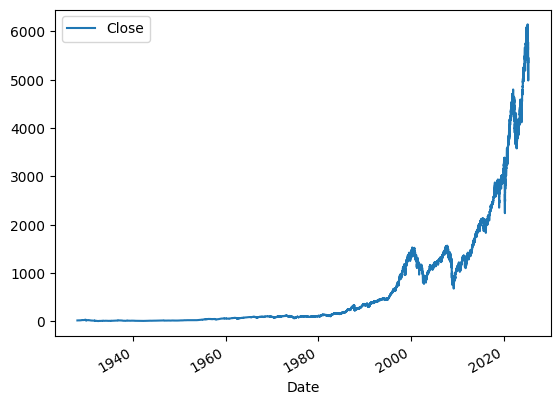

In [6]:
sp500.plot.line(y="Close", use_index = True) #shows the closing price of sp500 from the start

In [7]:
#Deleteing these two columns from our sp500 dataset since theyre arent relevant for this project. 
del sp500["Dividends"] 
del sp500["Stock Splits"] #stock splits are more relevant for individual stocks not an index fund so dont need that

In [8]:
# purpose of this cell is to create a new column called Tomorrow and basically the data in this columns will be the closing price of the next day. 
# hence the shift -1
sp500["Tomorrow"] = sp500["Close"].shift(-1) 

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-04-07 00:00:00-04:00,4953.790039,5246.569824,4835.040039,5062.250000,8691980000,4982.770020
2025-04-08 00:00:00-04:00,5193.569824,5267.470215,4910.419922,4982.770020,7408140000,5456.899902
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,5268.049805


In [10]:
# Now we are creating another column in our sp500 dataset. this one will return a boolean telling us whether the price of tomorrow is greater then the close of that day.
# Since we cant really use boolean to help us with training a model and machine learning, we will convert the boolean to an int where 1=True and 0=False
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-04-07 00:00:00-04:00,4953.790039,5246.569824,4835.040039,5062.250000,8691980000,4982.770020,0
2025-04-08 00:00:00-04:00,5193.569824,5267.470215,4910.419922,4982.770020,7408140000,5456.899902,1
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,5268.049805,0


In [12]:
# Having a lot of data is a good thing but in our case, having older stock market data dating back to the 1930s we don't want. 
# As times go on the market shifts and changes so a better timeframe to look at is starting from 1990.
# uses the pandas lib method "loc"| .copy is needed because pandas might give warning sometimes with a dataset
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-04-07 00:00:00-04:00,4953.790039,5246.569824,4835.040039,5062.250000,8691980000,4982.770020,0
2025-04-08 00:00:00-04:00,5193.569824,5267.470215,4910.419922,4982.770020,7408140000,5456.899902,1
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,5268.049805,0


In [14]:
from sklearn.ensemble import RandomForestClassifier #importing RandomForestCalssifier from scikit-learn’s ensemble module.
# This model is an ensemble learning method that builds multiple decision trees and combines their results for better accuracy.

# n_estimators=100 → Creates 100 decision trees in the forest.
# min_samples_split=100 → A node must have at least 100 samples before it splits into branches.
# random_state=1 → Ensures consistent results every time you run the code by fixing randomness.
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# train = sp500.iloc[:-100] → Uses all rows except the last 100 for training.
# test = sp500.iloc[-100:] → Uses only the last 100 rows for testing.
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

# train[predictors] → Extracts the selected feature columns from the training data.
# train["Target"] → Uses the "Target" column as the output label (the value the model tries to predict).
# .fit() → Trains the Random Forest model using the selected features.

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score #all this is saying is basically when we said that the market would go up (when target went up) did the market actually go up??

preds = model.predict(test[predictors]) # passing in test set with the predictors

In [16]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [17]:
precision_score(test["Target"], preds)

0.5161290322580645

In [18]:
combined = pd.concat([test["Target"], preds], axis = 1) # axis = 1 teaches each input as a column 

<Axes: xlabel='Date'>

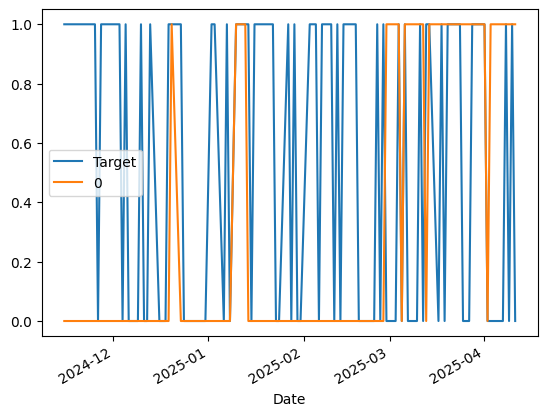

In [19]:
combined.plot() # this draws out a graph for us that shows our prediction (orange) and what actually happened (blue)

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start =2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    3736
1    2650
Name: count, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5286792452830189

In [25]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535703
0    0.464297
Name: count, dtype: float64

In [38]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

C:\Users\saadc\AppData\Local\Temp\ipykernel_30556\3577426866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
C:\Users\saadc\AppData\Local\Temp\ipykernel_30556\3577426866.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


In [ ]:
sp500
# We have a lot of NaNs. When pandas can't find enough days or enough rows prior to the current row to actually compute a rolling avg, itll just return NaN. 
#

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07 00:00:00-04:00,4953.790039,5246.569824,4835.040039,5062.250000,8691980000,4982.770020,0,0.998833,0.0,0.943151,2.0,0.865558,31.0,0.895859,141.0,1.088114,526.0
2025-04-08 00:00:00-04:00,5193.569824,5267.470215,4910.419922,4982.770020,7408140000,5456.899902,1,0.992088,0.0,0.951397,1.0,0.854023,31.0,0.881935,140.0,1.070843,525.0
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,5268.049805,0,1.045416,1.0,1.050514,1.0,0.936301,31.0,0.965652,141.0,1.172418,525.0


In [30]:
sp500 = sp500.dropna()

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-04 00:00:00-04:00,5292.140137,5292.140137,5069.899902,5074.080078,8853500000,5062.250000,0,0.969205,0.0,0.926384,3.0,0.865470,32.0,0.897863,141.0,1.090877,526.0
2025-04-07 00:00:00-04:00,4953.790039,5246.569824,4835.040039,5062.250000,8691980000,4982.770020,0,0.998833,0.0,0.943151,2.0,0.865558,31.0,0.895859,141.0,1.088114,526.0
2025-04-08 00:00:00-04:00,5193.569824,5267.470215,4910.419922,4982.770020,7408140000,5456.899902,1,0.992088,0.0,0.951397,1.0,0.854023,31.0,0.881935,140.0,1.070843,525.0


In [32]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [33]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
predictions = backtest(sp500, model, new_predictors) 

In [40]:
predictions["Predictions"].value_counts()

Predictions
0.0    4790
1.0     595
Name: count, dtype: int64

In [43]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5563025210084034